# Computing the Bayesian Hilbert Transform-DRT

In this tutorial example, we will demonstrate that the developed BHT-DRT framework is able to detect the inconsistency of the impedance. The synthetic data was generated using two ZARCs model, where the real and imaginary parts are from two different ZARC elements. In principle, the synthetic i

In [1]:
# import the libraries
import numpy as np
from math import pi, log10
import matplotlib.pyplot as plt
import seaborn as sns

# core library
import Bayes_HT
import importlib
importlib.reload(Bayes_HT)

<module 'Bayes_HT' from '/Users/jiapeng/Documents/Github/BHT/tutorials/Bayes_HT.py'>

In [2]:
# plot standards
plt.rc('font', family='serif', size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

## 1) Define the synthetic impedance experiment $Z_{\rm exp}(\omega)$

### 1.1) Define the frequency range

In [3]:
N_freqs = 81
freq_min = 10**-4    # Hz
freq_max = 10**4     # Hz
freq_vec = np.logspace(log10(freq_min), log10(freq_max), num=N_freqs, endpoint=True)
tau_vec = np.logspace(-log10(freq_max), -log10(freq_min), num=N_freqs, endpoint=True)
omega_vec = 2.*pi*freq_vec

### 1.2) Define the circuit parameters for the two ZARCs

In [4]:
R_ct = 50    # Ohm
R_inf = 10.  # Ohm
phi = 0.8
offset = 0.2
tau_0 = 1.   # sec
L_0 = 5E-4   # H

### 1.3) Generate exact impedance $Z_{\rm exact}(\omega)$ as well as the stochastic experiment $Z_{\rm exp}(\omega)$, here $Z_{\rm exp}(\omega)=Z_{\rm exact}(\omega)+\sigma_n(\varepsilon_{\rm re}+i\varepsilon_{\rm im})$

In [5]:
T = tau_0**phi/R_ct

Z_exact_re = 1./(1./R_ct+T*(1j*2.*pi*freq_vec)**phi)
Z_exact_im = R_ct/(1.+(1j*2.*pi*freq_vec*tau_0)**(phi+offset))
Z_exact = Z_exact_re.real + 1j*Z_exact_im.imag
Z_exact = R_inf + 1j*(2*pi*freq_vec)*L_0 + Z_exact

# random
rng = np.random.seed(121295)
sigma_n_exp = 0.8
Z_exp = Z_exact + sigma_n_exp*(np.random.normal(0, 1, N_freqs)+1j*np.random.normal(0, 1, N_freqs))

### 1.4) show the impedance in Nyquist plot

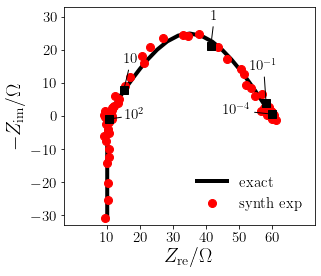

In [6]:
fig, ax = plt.subplots()
plt.plot(Z_exact.real, -Z_exact.imag, linewidth=4, color='black', label='exact')
plt.plot(np.real(Z_exp), -Z_exp.imag, 'o', markersize=8, color='red', label='synth exp')
plt.plot(np.real(Z_exp[0:70:20]), -np.imag(Z_exp[0:70:20]), 's', markersize=8, color="black")
plt.plot(np.real(Z_exp[30]), -np.imag(Z_exp[30]), 's', markersize=8, color="black")

plt.annotate(r'$10^{-4}$', xy=(np.real(Z_exp[0]), -np.imag(Z_exp[0])), 
             xytext=(np.real(Z_exp[0])-15, -np.imag(Z_exp[0])), 
             arrowprops=dict(arrowstyle='-',connectionstyle='arc'))
plt.annotate(r'$10^{-1}$', xy=(np.real(Z_exp[20]), -np.imag(Z_exp[20])), 
             xytext=(np.real(Z_exp[20])-5, 10-np.imag(Z_exp[20])), 
             arrowprops=dict(arrowstyle='-',connectionstyle='arc'))
plt.annotate(r'$1$', xy=(np.real(Z_exp[30]), -np.imag(Z_exp[30])), 
             xytext=(np.real(Z_exp[30]), 8-np.imag(Z_exp[30])), 
             arrowprops=dict(arrowstyle='-',connectionstyle='arc'))
plt.annotate(r'$10$', xy=(np.real(Z_exp[40]), -np.imag(Z_exp[40])), 
             xytext=(np.real(Z_exp[40]), 8-np.imag(Z_exp[40])), 
             arrowprops=dict(arrowstyle='-',connectionstyle='arc'))
plt.annotate(r'$10^2$', xy=(np.real(Z_exp[60]), -np.imag(Z_exp[60])), 
             xytext=(np.real(Z_exp[60])+5, -np.imag(Z_exp[60])), 
             arrowprops=dict(arrowstyle='-',connectionstyle='arc'))
plt.legend(frameon=False, fontsize = 15)
plt.axis('scaled')

plt.xlim(-3, 73)
plt.ylim(-33, 33)
plt.xticks(range(10, 70, 10))
plt.yticks(range(-30, 40, 10))
plt.xlabel(r'$Z_{\rm re}/\Omega$', fontsize = 20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize = 20)
plt.show()

## 2) Calculate the DRT impedance $Z_{\rm DRT}(\omega)$ and the Hilbert transformed impedance $Z_{\rm H}(\omega)$

### 2.1) optimize the hyperparamters

In [7]:
# set the parameters
sigma_n = 1
sigma_beta = 20
sigma_lambda = 20

theta_0 = np.array([sigma_n, sigma_beta, sigma_lambda])
data_real, data_imag, scores = Bayes_HT.HT_est(theta_0, Z_exp, freq_vec, tau_vec)

sigma_n; sigma_beta; sigma_lambda
8.11699e-01     19.999926     20.000200 
7.71171e-01     19.994946     20.033664 
7.66041e-01     19.945005     20.351803 
7.62925e-01     19.842586     20.996540 
7.61512e-01     19.632071     22.302361 
7.63619e-01     19.216154     24.836318 
7.65711e-01     19.018180     26.009175 
7.66377e-01     18.937698     26.463532 
7.66373e-01     18.917627     26.558279 
7.66307e-01     18.908405     26.583784 
7.66211e-01     18.895156     26.601910 
7.66097e-01     18.874388     26.603773 
7.66072e-01     18.845805     26.583173 
7.66169e-01     18.841846     26.557197 
7.66311e-01     18.843434     26.511405 
7.66295e-01     18.845178     26.524337 
7.66294e-01     18.845159     26.525901 
7.66294e-01     18.845132     26.525930 
7.66294e-01     18.845132     26.525930 
7.66296e-01     18.845134     26.525923 
7.66300e-01     18.845110     26.525903 
7.66300e-01     18.845113     26.525906 
7.66299e-01     18.845237     26.525945 
7.66300e-01     18.8452

### 2.2) Calculate the real part of the $Z_{\rm DRT}(\omega)$ and the imaginary part of the $Z_{\rm H}(\omega)$

#### 2.2.1) Bayesian regression to obtain the real part of impedance for both mean and covariance

In [8]:
mu_Z_re = data_real.get('mu_Z')
cov_Z_re = np.diag(data_real.get('Sigma_Z'))

# the mean and covariance of $R_\infty$
mu_R_inf = data_real.get('mu_gamma')[0]
cov_R_inf = np.diag(data_real.get('Sigma_gamma'))[0]

#### 2.2.2) Calculate the real part of DRT impedance for both mean and covariance

In [9]:
mu_Z_DRT_re = data_real.get('mu_Z_DRT')
cov_Z_DRT_re = np.diag(data_real.get('Sigma_Z_DRT'))

#### 2.2.3) Calculate the imaginary part of HT impedance for both mean and covariance

In [10]:
mu_Z_H_im = data_real.get('mu_Z_H')
cov_Z_H_im = np.diag(data_real.get('Sigma_Z_H'))

#### 2.2.4) Estimate the $\sigma_n$

In [11]:
sigma_n_re = data_real.get('theta')[0]

### 2.3) Calculate the imaginary part of the $Z_{\rm DRT}(\omega)$ and the real part of the $Z_{\rm H}(\omega)$

In [12]:
# 2.3.1 Bayesian regression
mu_Z_im = data_imag.get('mu_Z')
cov_Z_im = np.diag(data_imag.get('Sigma_Z'))

# the mean and covariance of the inductance $L_0$
mu_L_0 = data_imag.get('mu_gamma')[0]
cov_L_0 = np.diag(data_imag.get('Sigma_gamma'))[0]

# 2.3.2 DRT part
mu_Z_DRT_im = data_imag.get('mu_Z_DRT')
cov_Z_DRT_im = np.diag(data_imag.get('Sigma_Z_DRT'))

# 2.3.3 HT prediction
mu_Z_H_re = data_imag.get('mu_Z_H')
cov_Z_H_re = np.diag(data_imag.get('Sigma_Z_H'))

# 2.3.4 estimated sigma_n
sigma_n_im = data_imag.get('theta')[0]

## 3) Plot the BHT_DRT

### 3.1) plot the real parts of impedance for both Bayesian regression and the synthetic experiment

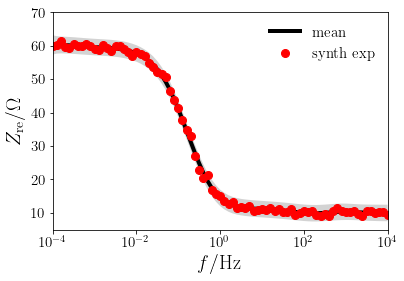

In [13]:
band = np.sqrt(cov_Z_re)
plt.fill_between(freq_vec, mu_Z_re-3*band, mu_Z_re+3*band,  facecolor='lightgrey')
plt.semilogx(freq_vec, mu_Z_re, linewidth=4, color='black', label='mean')
plt.semilogx(freq_vec, Z_exp.real, 'o', markersize=8, color='red', label='synth exp')
plt.xlim(1E-4, 1E4)
plt.ylim(5, 70)
plt.xscale('log')
plt.xlabel(r'$f/{\rm Hz}$', fontsize=20)
plt.ylabel(r'$Z_{\rm re}/\Omega$', fontsize=20)
plt.legend(frameon=False, fontsize = 15)
plt.show()

### 3.2 plot the imaginary parts of impedance for both Bayesian regression and the synthetic experiment

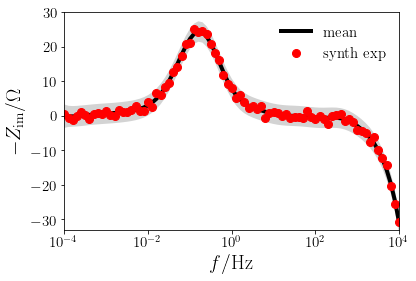

In [14]:
band = np.sqrt(cov_Z_im)
plt.fill_between(freq_vec, -mu_Z_im-3*band, -mu_Z_im+3*band,  facecolor='lightgrey')
plt.semilogx(freq_vec, -mu_Z_im, linewidth=4, color='black', label='mean')
plt.semilogx(freq_vec, -Z_exp.imag, 'o', markersize=8, color='red', label='synth exp')
plt.xlim(1E-4, 1E4)
plt.ylim(-33, 30)
plt.xscale('log')
plt.xlabel(r'$f/{\rm Hz}$', fontsize=20)
plt.ylabel(r'$-Z_{\rm im}/\Omega$', fontsize=20)
plt.legend(frameon=False, fontsize = 15)
plt.show()

### 3.3) plot the real parts of impedance for both Hilbert transform and the synthetic experiment

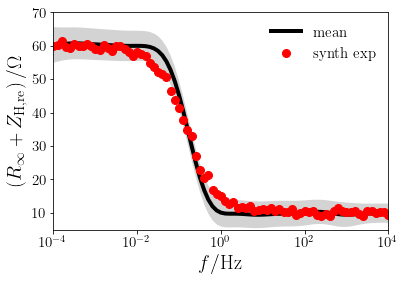

In [15]:
mu_Z_H_re_agm = mu_R_inf + mu_Z_H_re 
band_agm = np.sqrt(cov_R_inf + cov_Z_H_re + sigma_n_im**2)
plt.fill_between(freq_vec, mu_Z_H_re_agm-3*band_agm, mu_Z_H_re_agm+3*band_agm,  facecolor='lightgrey')
plt.semilogx(freq_vec, mu_Z_H_re_agm, linewidth=4, color='black', label='mean')
plt.semilogx(freq_vec, Z_exp.real, 'o', markersize=8, color='red', label='synth exp')
plt.xlim(1E-4, 1E4)
plt.ylim(5, 70)
plt.xscale('log')
plt.xlabel(r'$f/{\rm Hz}$', fontsize=20)
plt.ylabel(r'$\left(R_\infty + Z_{\rm H,re}\right)/\Omega$', fontsize=20)
plt.legend(frameon=False, fontsize = 15)
plt.show()

### 3.4) plot the imaginary parts of impedance for both Hilbert transform and the synthetic experiment

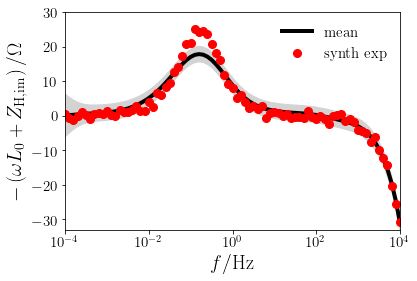

In [16]:
mu_Z_H_im_agm = omega_vec*mu_L_0 + mu_Z_H_im
band_agm = np.sqrt((omega_vec**2)*cov_L_0 + cov_Z_H_im + sigma_n_re**2)
plt.fill_between(freq_vec, -mu_Z_H_im_agm-3*band_agm, -mu_Z_H_im_agm+3*band_agm,  facecolor='lightgrey')
plt.semilogx(freq_vec, -mu_Z_H_im_agm, linewidth=4, color='black', label='mean')
plt.semilogx(freq_vec, -Z_exp.imag, 'o', markersize=8, color='red', label='synth exp')
plt.xlim(1E-4, 1E4)
plt.ylim(-33, 30)
plt.xscale('log')
plt.xlabel(r'$f/{\rm Hz}$', fontsize=20)
plt.ylabel(r'$-\left(\omega L_0 + Z_{\rm H,im}\right)/\Omega$', fontsize=20)
plt.legend(frameon=False, fontsize = 15)
plt.show()

### 3.5) plot the difference between real parts of impedance for Hilbert transform and the synthetic experiment

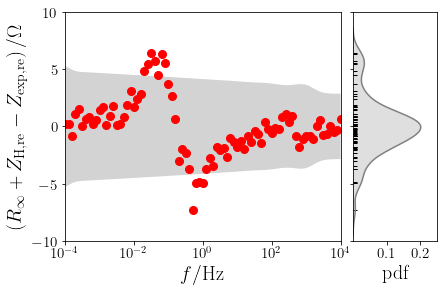

In [17]:
difference_re = mu_R_inf + mu_Z_H_re - Z_exp.real
band = np.sqrt(cov_R_inf + cov_Z_H_re + sigma_n_im**2)

fig = plt.figure(figsize=(12,4.2), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=1, ncols=4, left=0.05, right=0.48, wspace=0.15)
ax1 = fig.add_subplot(gs1[0, :-1])
ax2 = fig.add_subplot(gs1[0, -1])
ax1.fill_between(freq_vec, -3*band, 3*band,  facecolor='lightgrey')
ax1.plot(freq_vec, difference_re, 'o', markersize=8, color='red')
ax1.set_xlim(1E-4, 1E4)
ax1.set_ylim(-10, 10)
ax1.set_xscale('log')
ax1.set_xlabel(r'$f/{\rm Hz}$', fontsize=20)
ax1.set_ylabel(r'$\left(R_\infty + Z_{\rm H,re} - Z_{\rm exp,re}\right)/\Omega$', fontsize=20)

# density distribution plot
sns.kdeplot(difference_re, ax=ax2, shade=True, color='grey', vertical=True)
sns.rugplot(difference_re, ax=ax2, color='black', vertical=True)
ax2.set_xlim(0, 0.25)
ax2.set_xticks(np.arange(0.1, 0.25, 0.1))
ax2.set_yticks(ax1.get_yticks())
ax2.set_ylim(-10, 10)
ax2.set_yticklabels([])
ax2.set_xlabel(r'pdf',fontsize=20)
plt.show()

### 3.6) plot the difference between imaginary parts of impedance for Hilbert transform and the synthetic experiment

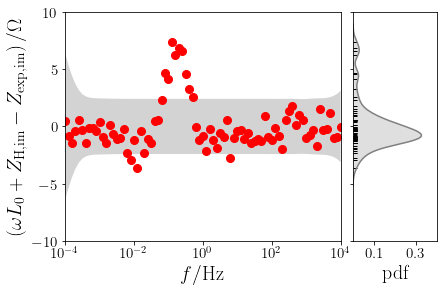

In [18]:
difference_im = omega_vec*mu_L_0 + mu_Z_H_im - Z_exp.imag 
band = np.sqrt((omega_vec**2)*cov_L_0 + cov_Z_H_im + sigma_n_re**2)

fig = plt.figure(figsize=(12,4.2), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=1, ncols=4, left=0.05, right=0.48, wspace=0.15)
ax1 = fig.add_subplot(gs1[0, :-1])
ax2 = fig.add_subplot(gs1[0, -1])
ax1.fill_between(freq_vec, -3*band, 3*band,  facecolor='lightgrey')
ax1.plot(freq_vec, difference_im, 'o', markersize=8, color='red')
ax1.set_xlim(1E-4, 1E4)
ax1.set_ylim(-10, 10)
ax1.set_xscale('log')
ax1.set_xlabel(r'$f/{\rm Hz}$', fontsize=20)
ax1.set_ylabel(r'$\left(\omega L_0 + Z_{\rm H,im} - Z_{\rm exp,im}\right)/\Omega$', fontsize=20)
# density distribution plot
sns.kdeplot(difference_im, ax=ax2, shade=True, color='grey', vertical=True)
sns.rugplot(difference_im, ax=ax2, color='black', vertical=True)
ax2.set_xlim(0, 0.4)
ax2.set_xticks(np.arange(0.1, 0.4, 0.2))
ax2.set_yticks(ax1.get_yticks())
ax1.set_ylim(-10, 10)
ax2.set_yticklabels([])
ax2.set_xlabel(r'pdf',fontsize=20)
plt.show()